In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras as k
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc ,roc_auc_score,confusion_matrix,accuracy_score, f1_score, precision_score, recall_score,fbeta_score
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from random import randint
import random
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [15]:
df=pd.read_csv('/media/areen/areen/archive/train.csv')
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [17]:
df=df.drop('id',axis=1)

In [18]:
df=df.round().drop_duplicates()
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [19]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [20]:
gender_map = {'Female':1, 'Male':2}
df['Gender'] = df['Gender'].map(gender_map)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,2,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,2,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [21]:
vehicle_age_map = {'< 1 Year':1, '1-2 Year':2, '> 2 Years':3}
df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_map)
df.head()


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,2,76,1,3.0,0,2,No,33536.0,26.0,183,0
2,2,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,2,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,1,No,27496.0,152.0,39,0


In [22]:
vehicle_damage_map = {'Yes':1, 'No':2}
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(vehicle_damage_map)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,76,1,3.0,0,2,2,33536.0,26.0,183,0
2,2,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,2,21,1,11.0,1,1,2,28619.0,152.0,203,0
4,1,29,1,41.0,1,1,2,27496.0,152.0,39,0


[]

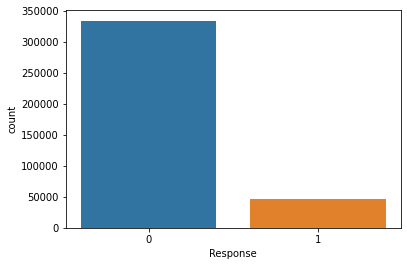

In [23]:
import seaborn as sns
sns.countplot('Response',data=df).plot()

In [24]:
Y=df.Response
balance_sample= df.drop(["Response"], axis = 1)
X=balance_sample
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(266588, 10)
(114252, 10)


In [25]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,2,44,1,28.0,0,3,1,40454.0,26.0,217
1,2,76,1,3.0,0,2,2,33536.0,26.0,183
2,2,47,1,28.0,0,3,1,38294.0,26.0,27
3,2,21,1,11.0,1,1,2,28619.0,152.0,203
4,1,29,1,41.0,1,1,2,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,2,74,1,26.0,1,2,2,30170.0,26.0,88
381105,2,30,1,37.0,1,1,2,40016.0,152.0,131
381106,2,21,1,30.0,1,1,2,35118.0,160.0,161
381107,1,68,1,14.0,0,3,1,44617.0,124.0,74


In [13]:
def population_func(numOfGeneration):
    activation = ['identity','logistic', 'tanh', 'relu']
    solver = ['lbfgs','sgd', 'adam']
    nb_neurons = [512, 768, 1024]
    nb_layers = [3, 4,5, 6]
    
    pop =  np.array([[random.choice(activation), random.choice(solver),random.choice(nb_layers), random.choice(nb_neurons)]])
    for i in range(0, numOfGeneration-1):
        pop = np.append(pop, [[random.choice(activation), random.choice(solver),random.choice(nb_layers), random.choice(nb_neurons)]], axis=0)
    return pop

def crossover_func(p1, p2):
    child = [p1[0], p2[1], p1[2], p2[3]]    
    return child

def mutation_func(child, prob_mutation):
    child_ = np.copy(child)
    for c in range(0, len(child_)):
        if np.random.rand() >= prob_mutation:
            k = randint(2,3)
            child_[c,k] = int(child_[c,k]) + randint(1, 4)
    return child_


def fitness_func(pop, X_train, y_train, X_test, y_test): 
    fitness = []
    for w in pop:
        model = MLPClassifier(learning_rate_init=0.09, activation=w[0],solver = w[1], 
                            alpha=1e-5, hidden_layer_sizes=(int(w[2]), 
                            int(w[3])),  max_iter=100, n_iter_no_change=80)
        try:
            model.fit(X_train, y_train)
            f1_score = f1_score(model.predict(X_test), y_test,average='micro')
            fitness.append([f1_score, model, w])
        except:
            pass
    return fitness


def main_func(X_train, y_train, X_test, y_test, num_epochs = 10, numOfGeneration=10, prob_mutation=0.8):
    pop = population_func(numOfGeneration)
    fitness = fitness_func(pop,  X_train, y_train, X_test, y_test)
    sortedFitness = np.array(list(reversed(sorted(fitness,key=lambda x: x[0]))))

    for j in range(0, num_epochs):
        length = len(sortedFitness)
        parent1 = sortedFitness[:,2][:length//2]
        parent2 = sortedFitness[:,2][length//2:]

        child1 = [crossover_func(parent1[i], parent2[i]) for i in range(0, np.min([len(parent2), len(parent1)]))]
        child2 = [crossover_func(parent2[i], parent1[i]) for i in range(0, np.min([len(parent2), len(parent1)]))]
        child2 = mutation_func(child2, prob_mutation)
        
        fitness_child1 = fitness_func(child1,X_train, y_train, X_test, y_test)
        fitness_child2 = fitness_func(child2, X_train, y_train, X_test, y_test)
        sortedFitness = np.concatenate((sortedFitness, fitness_child1, fitness_child2))
        sort = np.array(list(reversed(sorted(sortedFitness,key=lambda x: x[0]))))
        
        sortedFitness = sort[0:numOfGeneration, :]
        best_model = sort[0][1]
        
    return best_model

 GANN= main_func(X_train, y_train, X_test, y_test, num_epochs = 10, numOfGeneration=10, prob_mutation=0.7)

predictions = GANN.predict(X_test)
print (accuracy_score(predictions, y_test))



w ['identity' 'sgd' '10' '26']
w ['tanh' 'adam' '37' '40']
w ['tanh' 'adam' '47' '8']
w ['identity' 'lbfgs' '26' '2']
w ['relu' 'lbfgs' '18' '9']
w ['relu' 'lbfgs' '49' '24']
w ['logistic' 'adam' '7' '33']
w ['identity' 'adam' '16' '39']
w ['logistic' 'adam' '42' '8']
w ['tanh' 'sgd' '20' '47']
pai_1 tanh
pai_1 tanh
pai_1 lbfgs
pai_2 2
pai_1 logistic
pai_1 logistic
pai_1 adam
pai_2 39
pai_1 logistic
pai_1 logistic
pai_1 lbfgs
pai_2 24
pai_1 tanh
pai_1 tanh
pai_1 lbfgs
pai_2 9
pai_1 identity
pai_1 identity
pai_1 adam
pai_2 40
pai_1 identity
pai_1 identity
pai_1 sgd
pai_2 47
pai_1 identity
pai_1 identity
pai_1 adam
pai_2 8
pai_1 relu
pai_1 relu
pai_1 adam
pai_2 33
pai_1 relu
pai_1 relu
pai_1 adam
pai_2 8
pai_1 tanh
pai_1 tanh
pai_1 sgd
pai_2 26
w ['tanh', 'lbfgs', '20', '2']
w ['logistic', 'adam', '42', '39']
w ['logistic', 'lbfgs', '7', '24']
w ['tanh', 'lbfgs', '47', '9']
w ['identity', 'adam', '10', '40']
w ['identity' 'sgd' '26' '47']
w ['identity' 'adam' '16' '8']
w ['relu' 'adam' '

In [14]:
y_pred_proba = GANN.predict_proba(X_test)[:, 1]

#roc 
roc=roc_auc_score(y_test,y_pred_proba)
roc

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('false postive rate',fpr.mean())
print('true  postive rate',tpr.mean())



false postive rate 0.16246211250117853
true  postive rate 0.5375121141367698


Precision:  0.5756097560975609
Recall:  0.0076963214192538485
Average precision-recall score: 0.13


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.13')

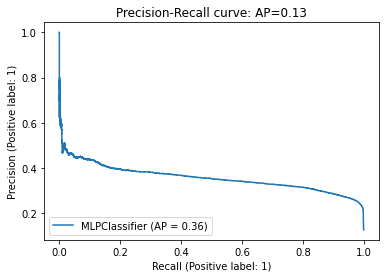

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

#calculating precision and reall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(GANN, X_test, y_test)

average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp.ax_.set_title('Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))

0.8524008881576486
false postive rate 0.16246211250117853
true  postive rate 0.5375121141367698
Area under the ROC curve : %f 0.8524008881576486
Area under the Receiver Operating Characteristic curve: 0.8524008881576486


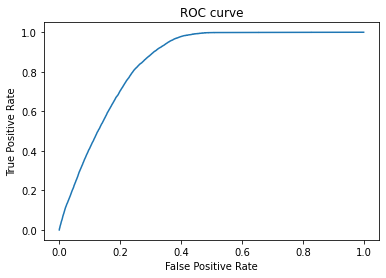

In [16]:
from sklearn.metrics import roc_curve, auc ,roc_auc_score,confusion_matrix,accuracy_score, f1_score, precision_score, recall_score,fbeta_score

#plot roc curve 
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', roc_auc_score(y_test, y_pred_proba))

In [22]:
model_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision','Recall', 'F1 Score', 'F2 Score','ROC','TPR','FPR'])


In [23]:
model_results.loc[len(model_results.index)] = models_results(GANN,"GA-Nueral network",y_test,predictions)
print(model_results)

[[110259     87]
 [ 15214    118]]
               Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0  GA-Nueral network     87.78   0.612613  0.018789  0.031427  0.009588   

        ROC       TPR       FPR  
0  0.852268  0.999212  0.992304  


In [18]:
def models_results(model,model_name,y_tst,y_pred):
    cnf_matrix = confusion_matrix(y_tst, y_pred)
    print(cnf_matrix)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    #Accuracy
    cross_val_acc = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    acc=round(cross_val_acc.max() * 100 , 2)
    
    #F1
    f1 =cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    #precision
    prec =cross_val_score(model, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
   
    #recall
    rec =cross_val_score(model, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
   
    #F2
    f2 = fbeta_score(y_tst, y_pred, beta=2.0)
    
    #ROC
    roc =cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

    # TPR
    TPR = TP/(TP+FN)
    
    #FPR
    FPR = FP/(FP+TN)
    
    results=[model_name, acc, prec.max(), rec.max(), f1.max(), f2,roc.max(),TPR.max(),FPR.max()]
    return results

In [20]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=1, shuffle=True)
cv

KFold(n_splits=3, random_state=1, shuffle=True)